# Load Data

In [1]:
import music21
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mnet

Create path to access local files

In [2]:
'''
Creat local corpus with access pieces
'''

localCorpus = music21.corpus.corpora.LocalCorpus()
localCorpus.addPath('../library')
music21.corpus.cacheMetadata()

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: local metadata cache: starting processing of paths: 12
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1587703194.108011
bundles.py: WARNING: Skipped 12 sources already in cache.
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.025 md items: 12

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
caching.py: WARNING: cache: final writing time: 0.025 seconds


Save Telemann Fantasie No. 1 as a stream object

In [4]:
s = music21.corpus.parse('telemannfantasie1.xml')

Convert Annotated Version into chords

In [13]:
chord_stream = s.chordify()

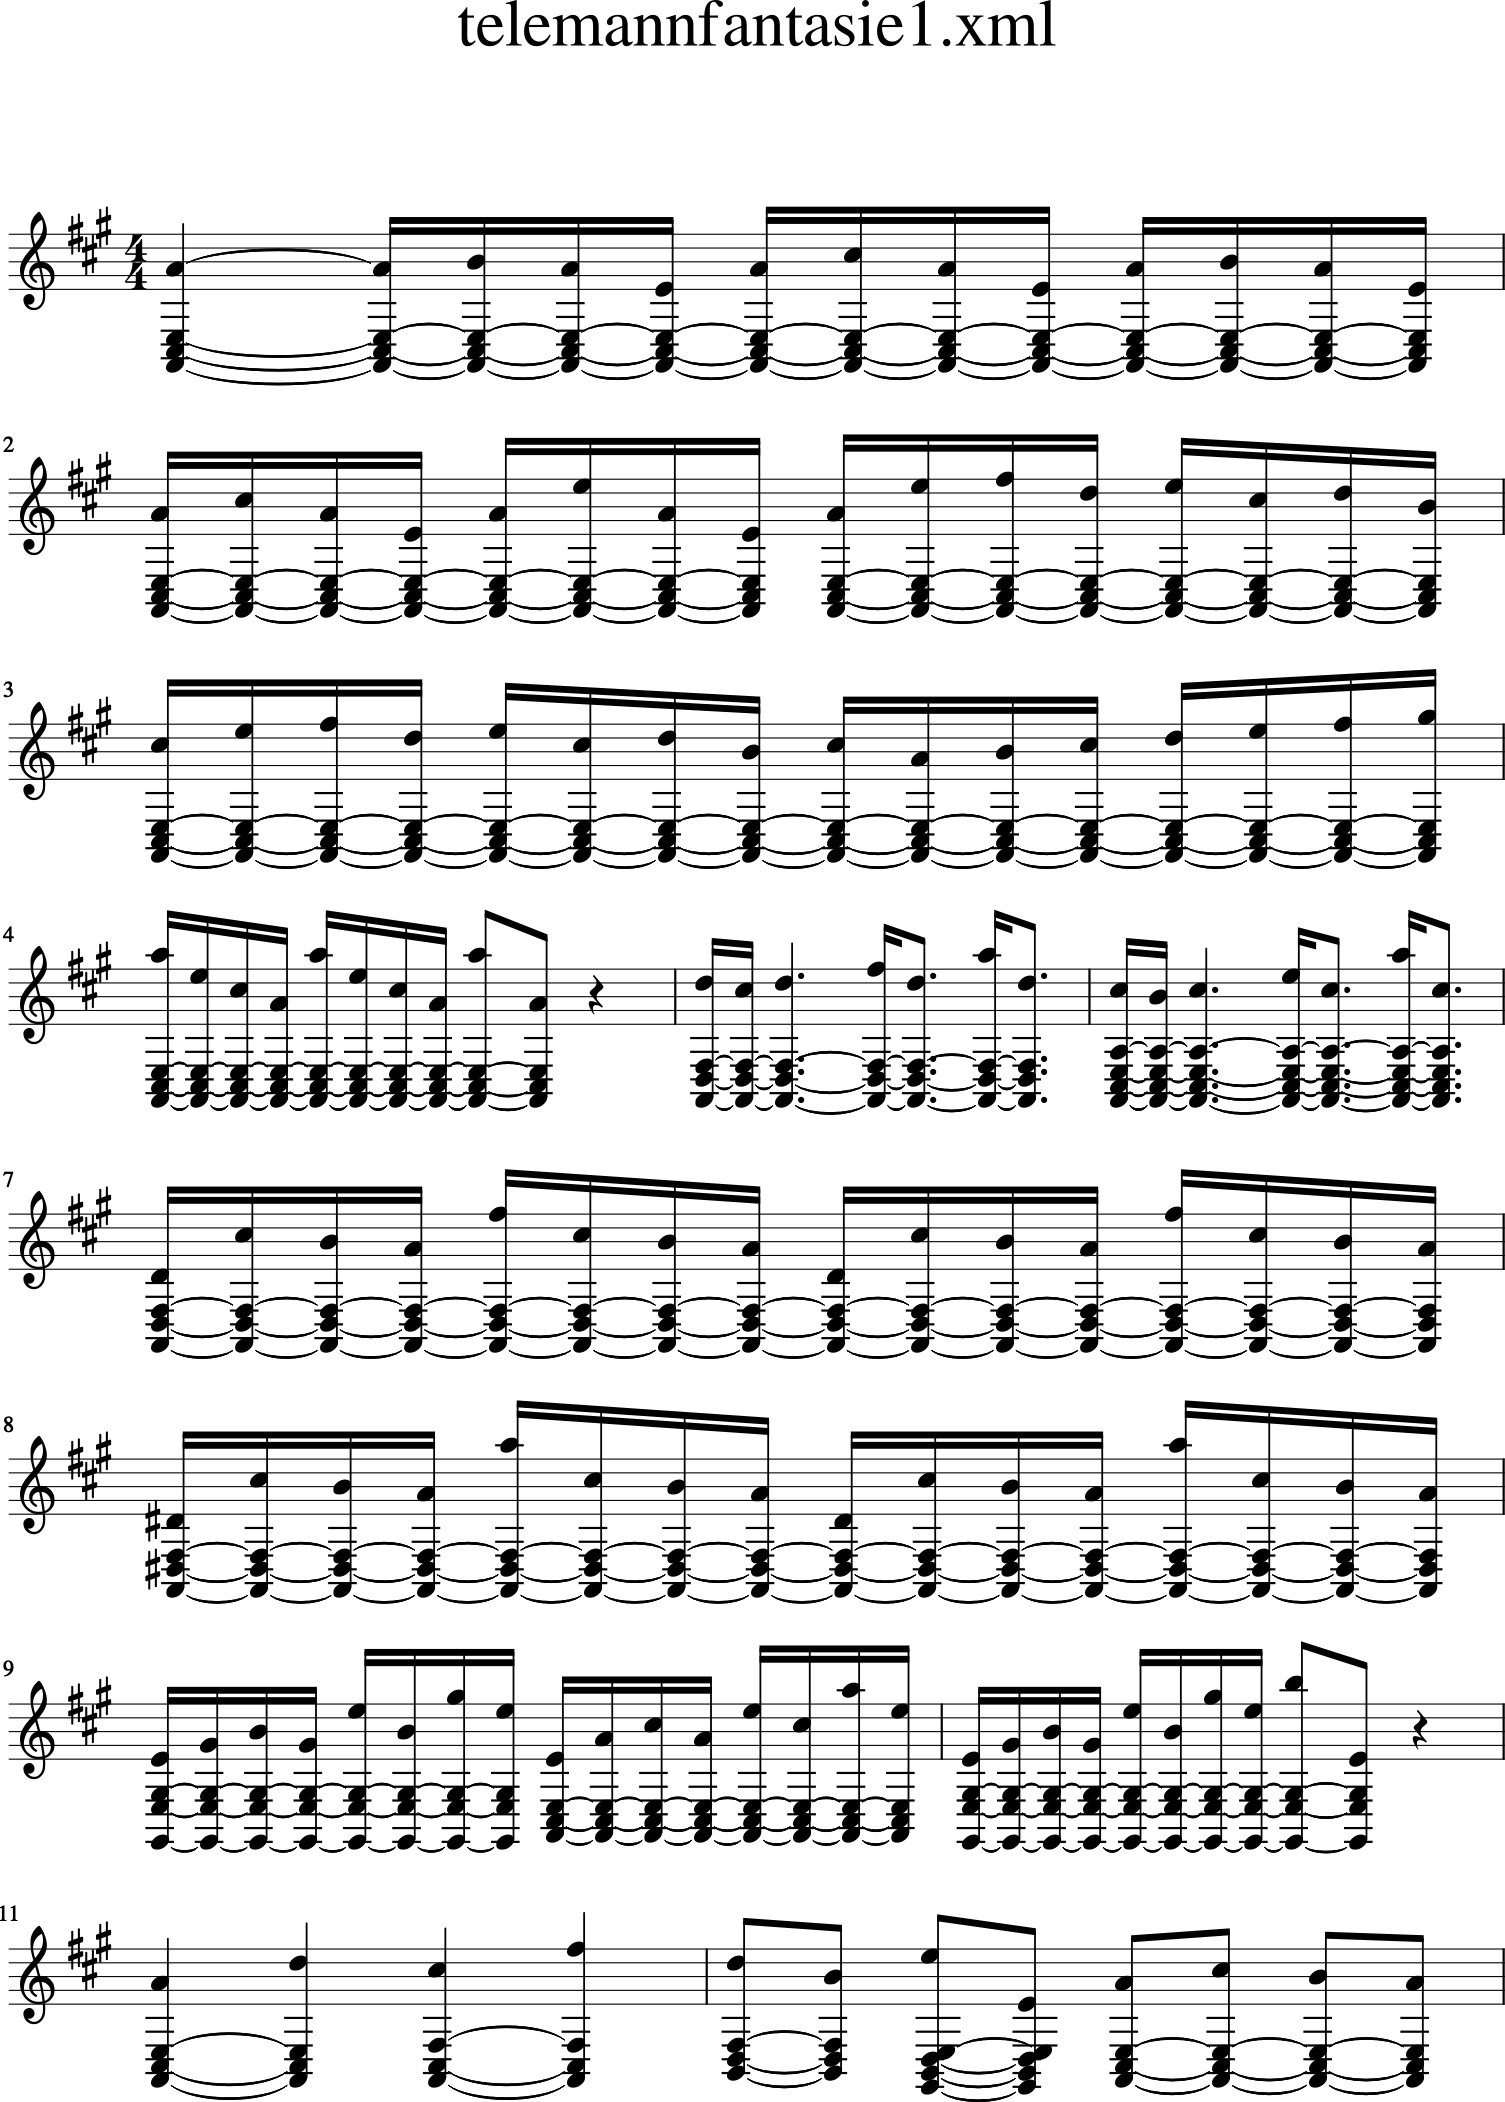

In [7]:
chord_stream.show()


# Conversion to notes
    This conversion assumes a uniform key of A Major (derived from the piece's key signature) and assigns a roman numeral to each chord

In [14]:
chords = list(chord_stream.recurse().notes)

In [28]:
list(chords)

[<music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 B4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 C#5>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 B4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 C#5>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E5>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E4>,
 <music21.chord.Chord A2 C#3 E3 A4>,
 <music21.chord.Chord A2 C#3 E3 E5>,
 <music21.chord.Chord A2 C#3 E3 F#5>,
 <music21.chord.Chord A2 C#3 E3 D5>,
 <music21.chord.Chord A2 C#3 E3 E5>,
 <music21.chord.Chord A2 C#3 E3 C#5

In [26]:
rn_lst = []
for chord in chords:
    rf = music21.roman.romanNumeralFromChord(chord, music21.key.Key('A'))
    string=str(rf)
    rn_lst.append(str(string).split()[1])

In [27]:
rn_lst

['I',
 'I',
 'I532',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I532',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'vi65',
 'I543',
 'I',
 'I',
 'I543',
 'I532',
 'I',
 'I',
 'vi65',
 'I543',
 'I',
 'I',
 'I543',
 'I532',
 'I',
 'I',
 'I532',
 'I',
 'I543',
 'I',
 'vi65',
 'I7',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'IV64',
 'IV43',
 'IV64',
 'IV64',
 'IV64',
 'IV64',
 'IV64',
 'I',
 'I532',
 'I',
 'I',
 'I',
 'I',
 'I',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 '#ivob64',
 '#iv/ob64b3',
 'II6#42',
 '#ivob64',
 '#ivob64',
 '#iv/ob64b3',
 'II6#42',
 '#ivob64',
 '#ivob64',
 '#iv/ob64b3',
 'II6#42',
 '#ivob64',
 '#ivob64',
 '#iv/ob64b3',
 'II6#42',
 '#ivob64',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'V6',
 'I'

Each Roman Numeral is Node

In [31]:
nodelst = rn_lst

Create Multiedge Directional Graph

In [32]:
g_rn=mnet.create_graph(nodelst)

#write as .gexf
nx.write_gexf(g_rn, "rn_composition.gexf")

Run and Save Random Walk

In [44]:
randomwalk=mnet.generate_randomwalk(g_rn)

In [45]:
randomwalk

['I',
 'I532',
 'I',
 'I',
 'I',
 'I',
 'vi65',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II',
 'II75#3',
 'V6',
 'V6',
 'II75#3',
 'II75#32',
 'V64',
 'V64',
 'I',
 'I',
 'I',
 'IV6',
 'ii64',
 'ii64',
 'vi6',
 'vi6',
 'vi6',
 'vi6',
 'IV64',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 'IV64',
 'IV654',
 'IV64',
 'IV43',
 'IV64',
 'IV64',
 'ii42',
 'IV64',
 'IV764',
 'IV64',
 'IV43',
 'IV64',
 'IV64',
 'IV64',
 'I',
 'IV64',
 'IV64',
 'IV64',
 'I',
 'I',
 'I',
 'I',
 'IV64',
 'IV43',
 'ii42',
 'IV64',
 'IV64',
 'IV764',
 'IV64',
 'IV43',
 'IV64',
 'IV764',
 'IV64',
 'IV64',
 'V65',
 'iii6543',
 'V65',
 'V65',
 'V65',
 'V65',
 'V65',
 'V65',
 'V65',
 'I',
 'IV64',
 'IV64',
 'IV654',
 'IV64',
 'IV64',
 'ii42',
 'IV64',
 'IV64',
 'IV43',
 'ii42',
 'V7',
 'V7',
 'V7',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'vi65',
 'I7',
 'I',
 'I',
 'I543',
 'I',
 'I',
 'I32',
 'I',
 'I543',
 'I532',
 'I']

Convert random walk to back to music.

Uses conversion function strto16thnote, which takes a pitch string and converts it to a note with length of 16th note

In [49]:
def str_rnchord(randomwalk):
    chordlst=[]
    for node in randomwalk:
        chord = music21.roman.RomanNumeral(node, "A")
        chord.duration.quarterLength =.5
        chord.lyric = chord.figure
        chordlst.append(chord)
    return chordlst

In [50]:
new_composition_basic = mnet.convert_to_stream(randomwalk, str_rnchord)

#Write to MIDI 
#file = new_composition_basic.write('xml', "rn.xml")


In [52]:
new_composition_basic.show("text")

{0.0} <music21.roman.RomanNumeral I in A major>
{0.5} <music21.roman.RomanNumeral I532 in A major>
{1.0} <music21.roman.RomanNumeral I in A major>
{1.5} <music21.roman.RomanNumeral I in A major>
{2.0} <music21.roman.RomanNumeral I in A major>
{2.5} <music21.roman.RomanNumeral I in A major>
{3.0} <music21.roman.RomanNumeral vi65 in A major>
{3.5} <music21.roman.RomanNumeral II in A major>
{4.0} <music21.roman.RomanNumeral II in A major>
{4.5} <music21.roman.RomanNumeral II in A major>
{5.0} <music21.roman.RomanNumeral II in A major>
{5.5} <music21.roman.RomanNumeral II in A major>
{6.0} <music21.roman.RomanNumeral II in A major>
{6.5} <music21.roman.RomanNumeral II in A major>
{7.0} <music21.roman.RomanNumeral II in A major>
{7.5} <music21.roman.RomanNumeral II in A major>
{8.0} <music21.roman.RomanNumeral II in A major>
{8.5} <music21.roman.RomanNumeral II in A major>
{9.0} <music21.roman.RomanNumeral II in A major>
{9.5} <music21.roman.RomanNumeral II in A major>
{10.0} <music21.roman